In [1]:
library(dplyr)
library(MASS)
library(class)


Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select



In [12]:
### File import
raw_data <- read.csv(file="cookie_cats_user_engagement.csv", sep=",", head=TRUE)
head(raw_data)

userid,version,sum_gamerounds,retention_1,retention_7
116,gate_30,3,FALSE,FALSE
337,gate_30,38,TRUE,FALSE
377,gate_40,167,TRUE,FALSE
483,gate_40,2,FALSE,FALSE
488,gate_40,182,TRUE,TRUE
540,gate_40,190,TRUE,TRUE


In [89]:
### Filtering to generate 2 datasets
n_reference <- sum(raw_data$version == "gate_30")
n_test <- sum(raw_data$version == "gate_40")
n_total <- n_reference + n_test
print(paste0("Number of reference values: ",n_reference))
print(paste0("Number of test values: ",n_test))
print(paste0("Total number of entries: ", n_total))

[1] "Number of reference values: 44700"
[1] "Number of test values: 45489"
[1] "Total number of entries: 90189"


In [90]:
### Separating the datasets
reference <- raw_data[grep("gate_30",raw_data$version),]
test <-raw_data[grep("gate_40",raw_data$version),]
print(head(reference))
print(head(test))

   userid version sum_gamerounds retention_1 retention_7
1     116 gate_30              3       FALSE       FALSE
2     337 gate_30             38        TRUE       FALSE
7    1066 gate_30              0       FALSE       FALSE
12   2101 gate_30              0       FALSE       FALSE
14   2179 gate_30             39        TRUE       FALSE
15   2218 gate_30            305        TRUE        TRUE
  userid version sum_gamerounds retention_1 retention_7
3    377 gate_40            167        TRUE       FALSE
4    483 gate_40              2       FALSE       FALSE
5    488 gate_40            182        TRUE        TRUE
6    540 gate_40            190        TRUE        TRUE
8   1444 gate_40              5       FALSE       FALSE
9   1574 gate_40            111        TRUE        TRUE


In [91]:
print(summary(raw_data))
print(summary(reference))
print(summary(test))

     userid           version      sum_gamerounds     retention_1    
 Min.   :    116   gate_30:44700   Min.   :    0.00   Mode :logical  
 1st Qu.:2512230   gate_40:45489   1st Qu.:    6.00   FALSE:50036    
 Median :4995815                   Median :   18.00   TRUE :40153    
 Mean   :4998412                   Mean   :   52.88                  
 3rd Qu.:7496452                   3rd Qu.:   52.00                  
 Max.   :9999861                   Max.   :49854.00                  
 retention_7    
 Mode :logical  
 FALSE:73408    
 TRUE :16781    
                
                
                
     userid           version      sum_gamerounds     retention_1    
 Min.   :    116   gate_30:44700   Min.   :    0.00   Mode :logical  
 1st Qu.:2505469   gate_40:    0   1st Qu.:    5.00   FALSE:24666    
 Median :4983631                   Median :   17.00   TRUE :20034    
 Mean   :4987564                   Mean   :   52.46                  
 3rd Qu.:7481497                   3rd Qu

In [92]:
quantile(raw_data_filtered$sum_gamerounds, probs = c(0.01, 0.99))[2]
raw_data_filtered <- raw_data[raw_data$sum_gamerounds <= 493,]
reference <- raw_data_filtered[grep("gate_30",raw_data_filtered$version),]
test <-raw_data_filtered[grep("gate_40",raw_data_filtered$version),]

99% 
366

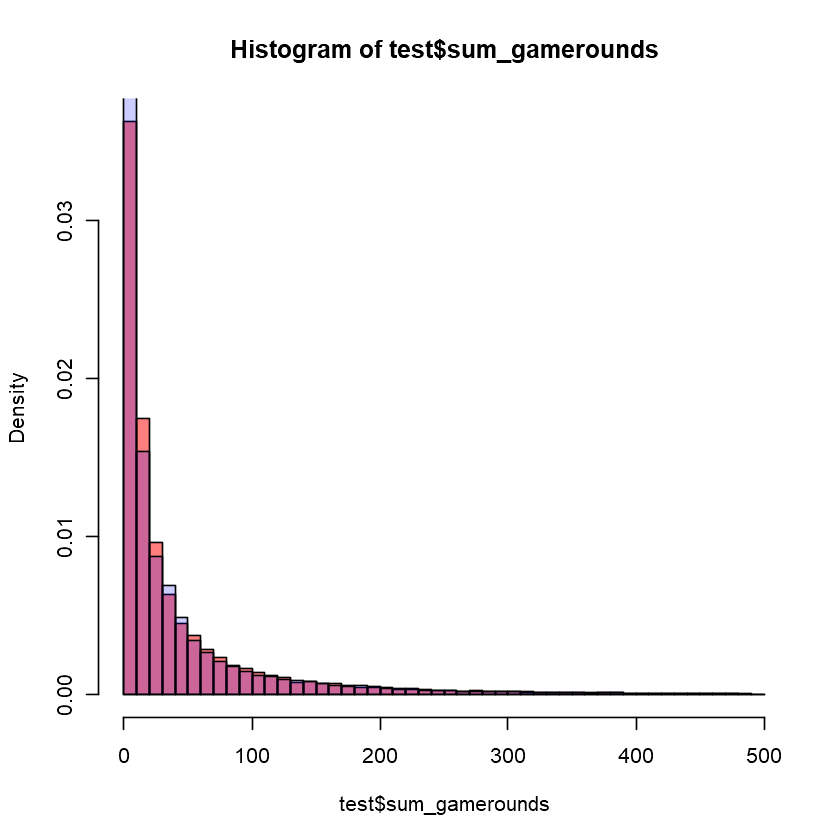

In [93]:
hist(test$sum_gamerounds, col = rgb(1,0,0,0.5), breaks = seq(0,500,10), probability = T, )
hist(reference$sum_gamerounds, add = T, col = rgb(0,0,1,0.2), breaks = seq(0,500,10), probability = T)

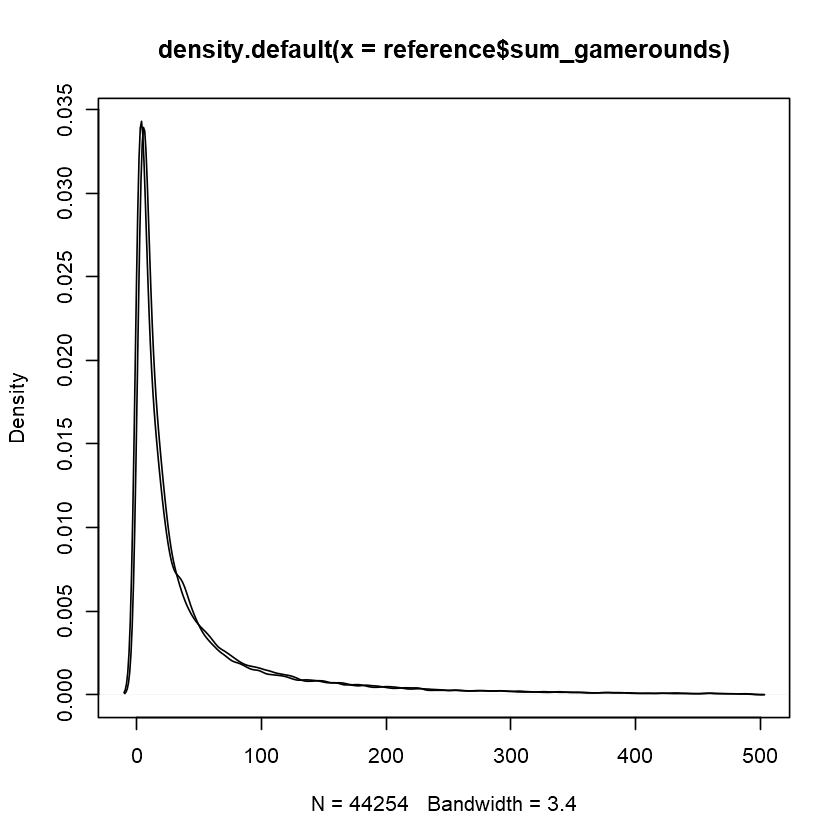

In [94]:
plot(density(reference$sum_gamerounds))
lines(density(test$sum_gamerounds), )

In [101]:
## Estadisticos:
mean_test = mean(test$sum_gamerounds)
mean_reference = mean(reference$sum_gamerounds)

sd_test = sd(test$sum_gamerounds)
sd_reference = sd(reference$sum_gamerounds)

n_test = nrow(test)
n_reference = nrow(test)

In [103]:
sd_reference*sd_reference/n_reference

[1] 0.1155015

In [106]:
## Calculo de Z

delta_mu = mean_test - mean_reference
sd_delta_mu = sqrt((sd_reference*sd_reference)/n_reference + (sd_test*sd_test)/n_test)

print(delta_mu)
print(sd_delta_mu)

z = delta_mu / sd_delta_mu

print(z)

[1] 1.698575
[1] 0.4783202
[1] 3.551125
